# UJIAN AKHIR SEMESTER
#### Nama: Muthia Rahmatun Nisa'
#### NIM: 2361109

# Dataset Selection and Exploration

In [2]:
import pandas as pd

# Muat dataset
df = pd.read_csv('onlinefoods.csv')

# Tampilkan 5 baris pertama
print(df.head())

# Tampilkan informasi dasar dataset
print(df.info())

# Tampilkan statistik deskriptif untuk kolom numerik
print(df.describe())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

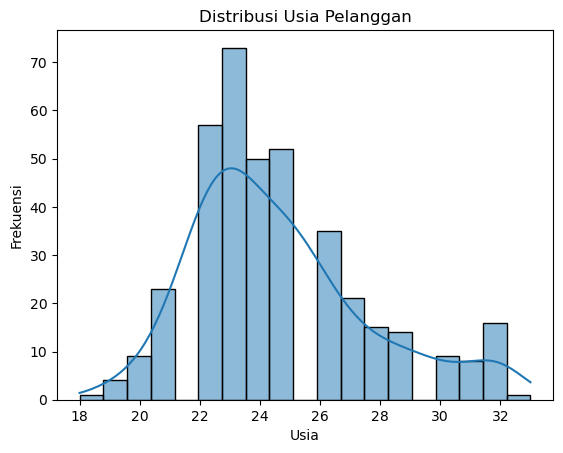

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age'], kde=True)
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

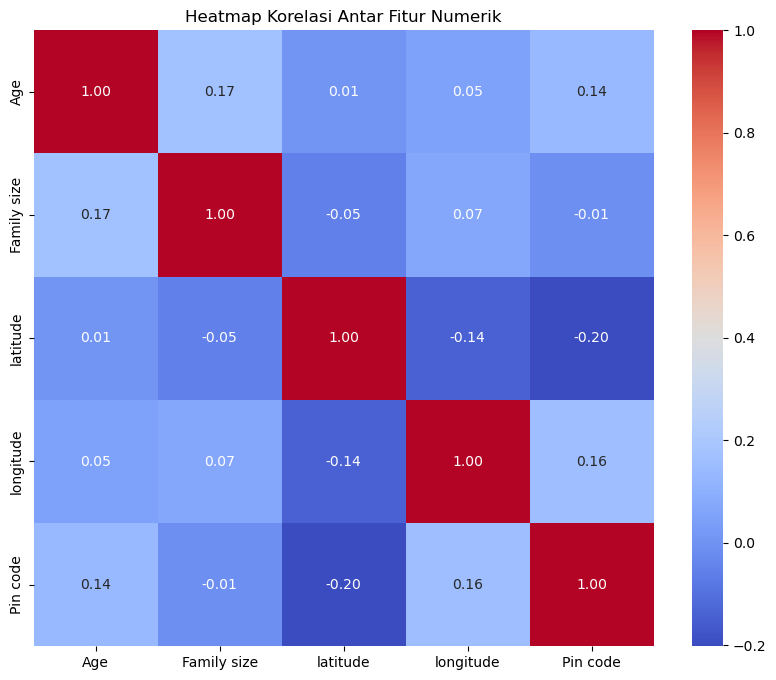

In [4]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

# Data Preprocessing

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Muat Dataset
print("Memuat dataset...")
df = pd.read_csv('onlinefoods.csv')
print("Dataset berhasil dimuat. Dimensi:", df.shape)
print("\nLima baris pertama dataset:")
print(df.head())

Memuat dataset...
Dataset berhasil dimuat. Dimensi: (388, 13)

Lima baris pertama dataset:
   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive    

In [6]:
# Periksa Nilai Hilang
print("\nMemeriksa nilai hilang...")
missing_values = df.isnull().sum()
print("Jumlah nilai hilang per kolom:\n", missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("Tidak ada nilai hilang dalam dataset.")


Memeriksa nilai hilang...
Jumlah nilai hilang per kolom:
 Series([], dtype: int64)
Tidak ada nilai hilang dalam dataset.


In [7]:
# Identifikasi Kolom Numerik dan Kategorikal
numerical_features = ['Age', 'Family size', 'latitude', 'longitude']
# Variabel kategorikal ordinal dengan urutan
ordinal_features = ['Monthly Income', 'Educational Qualifications']
# Variabel kategorikal nominal (tanpa urutan)
nominal_features = ['Gender', 'Marital Status', 'Occupation', 'Feedback', 'Pin code']
# Target variabel
target_feature = 'Output'

print("\nFitur Numerik:", numerical_features)
print("Fitur Kategorikal Ordinal:", ordinal_features)
print("Fitur Kategorikal Nominal:", nominal_features)
print("Fitur Target:", target_feature)


Fitur Numerik: ['Age', 'Family size', 'latitude', 'longitude']
Fitur Kategorikal Ordinal: ['Monthly Income', 'Educational Qualifications']
Fitur Kategorikal Nominal: ['Gender', 'Marital Status', 'Occupation', 'Feedback', 'Pin code']
Fitur Target: Output


In [8]:
# Encoding Variabel Kategorikal Ordinal dan Target
# Tentukan mapping untuk Monthly Income
monthly_income_mapping = {
    'No Income': 0,
    'Below Rs.10000': 1,
    '10001 to 25000': 2,
    '25001 to 50000': 3,
    'More than 50000': 4
}
df['Monthly Income'] = df['Monthly Income'].map(monthly_income_mapping)

In [9]:
# Tentukan mapping untuk Educational Qualifications
edu_qual_mapping = {
    'School': 0,
    'Graduate': 1,
    'Post Graduate': 2,
    'Ph.D': 3
}
df['Educational Qualifications'] = df['Educational Qualifications'].map(edu_qual_mapping)

df['Pin code'] = df['Pin code'].astype(str)

In [10]:
# Encoding target variabel 'Output'
le = LabelEncoder()
df[target_feature] = le.fit_transform(df[target_feature]) # 'Yes' -> 1, 'No' -> 0
print(f"\nLabel Encoding untuk '{target_feature}':")
print(f"Mapping: {list(le.classes_)} -> {np.unique(df[target_feature])}")

print("\nDataset setelah Ordinal dan Label Encoding, dan Pin code diubah ke string:")
print(df.head())


Label Encoding untuk 'Output':
Mapping: ['No', 'Yes'] -> [0 1]

Dataset setelah Ordinal dan Label Encoding, dan Pin code diubah ke string:
   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student               0   
1   24  Female         Single    Student               1   
2   22    Male         Single    Student               1   
3   22  Female         Single    Student               0   
4   22    Male         Single    Student               1   

   Educational Qualifications  Family size  latitude  longitude Pin code  \
0                         2.0            4   12.9766    77.5993   560001   
1                         1.0            3   12.9770    77.5773   560009   
2                         2.0            3   12.9551    77.6593   560017   
3                         1.0            6   12.9473    77.5616   560019   
4                         2.0            4   12.9850    77.5533   560010   

   Output   Feedback Unnamed: 12  
0      

In [11]:
# Pisahkan Fitur (X) dan Target (y)
X = df.drop(columns=[target_feature])
y = df[target_feature]

print(f"\nDimensi Fitur (X): {X.shape}")
print(f"Dimensi Target (y): {y.shape}")


Dimensi Fitur (X): (388, 12)
Dimensi Target (y): (388,)


In [12]:
# Pipeline untuk Pra-pemrosesan (Scaling dan One-Hot Encoding) 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        # Tambahkan sparse_output=False untuk memastikan OneHotEncoder menghasilkan array dense
        ('cat_nom', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_features)
    ],
    remainder='drop' # Ubah remainder menjadi 'drop' untuk memastikan tidak ada kolom string yang tidak diproses lolos
)

In [13]:
# Bagi Dataset menjadi Training dan Testing Sets
# Menggunakan stratify=y untuk memastikan proporsi kelas 'Output' yang sama di train dan test sets
print("\nMembagi dataset menjadi training (80%) dan testing (20%) sets dengan stratified sampling...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dimensi X_train: {X_train.shape}")
print(f"Dimensi X_test: {X_test.shape}")
print(f"Dimensi y_train: {y_train.shape}")
print(f"Dimensi y_test: {y_test.shape}")


Membagi dataset menjadi training (80%) dan testing (20%) sets dengan stratified sampling...
Dimensi X_train: (310, 12)
Dimensi X_test: (78, 12)
Dimensi y_train: (310,)
Dimensi y_test: (78,)


In [14]:
# Periksa proporsi kelas di training dan testing sets
print("\nProporsi kelas 'Output' di dataset asli:")
print(y.value_counts(normalize=True))
print("\nProporsi kelas 'Output' di training set:")
print(y_train.value_counts(normalize=True))
print("\nProporsi kelas 'Output' di testing set:")
print(y_test.value_counts(normalize=True))



Proporsi kelas 'Output' di dataset asli:
Output
1    0.775773
0    0.224227
Name: proportion, dtype: float64

Proporsi kelas 'Output' di training set:
Output
1    0.774194
0    0.225806
Name: proportion, dtype: float64

Proporsi kelas 'Output' di testing set:
Output
1    0.782051
0    0.217949
Name: proportion, dtype: float64


In [15]:
# Terapkan Pra-pemrosesan pada Training dan Testing Sets
print("\nMenerapkan pra-pemrosesan (scaling dan one-hot encoding)...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nBentuk akhir X_train_processed:", X_train_processed.shape)
print("Bentuk akhir X_test_processed:", X_test_processed.shape)

print("\nPra-pemrosesan data selesai!")


Menerapkan pra-pemrosesan (scaling dan one-hot encoding)...

Bentuk akhir X_train_processed: (310, 88)
Bentuk akhir X_test_processed: (78, 88)

Pra-pemrosesan data selesai!


# Model Training and Comparison

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# Dictionary untuk menyimpan hasil evaluasi model
model_results = {}

In [17]:
# Fungsi pembantu untuk mengevaluasi dan mencetak metrik
def evaluate_model(model_name, y_true, y_pred, cv_scores):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    print(f"\n--- {model_name} Performance ---")
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Presisi: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_true, y_pred, zero_division=0))
    print("Matriks Kebingungan:")
    print(confusion_matrix(y_true, y_pred))

    print(f"\nCross-Validation Scores ({len(cv_scores)} folds):")
    for i, score in enumerate(cv_scores):
        print(f"Fold {i+1}: {score:.4f}")
    print(f"Rata-rata CV Akurasi: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

    model_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Accuracy (Mean)': np.mean(cv_scores)
    }

In [18]:
# Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs'] # Algorithm to use in the optimization problem
}

grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_processed, y_train)

best_lr_model = grid_search_lr.best_estimator_
print(f"\nParameter Terbaik untuk Logistic Regression: {grid_search_lr.best_params_}")

y_pred_lr = best_lr_model.predict(X_test_processed)

# Cross-validation
cv_scores_lr = cross_val_score(best_lr_model, X_train_processed, y_train, cv=5, scoring='accuracy', n_jobs=-1)
evaluate_model("Logistic Regression", y_test, y_pred_lr, cv_scores_lr)


Parameter Terbaik untuk Logistic Regression: {'C': 1, 'solver': 'lbfgs'}

--- Logistic Regression Performance ---
Akurasi: 0.9103
Presisi: 0.9107
Recall: 0.9103
F1-Score: 0.9043

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        17
           1       0.91      0.98      0.94        61

    accuracy                           0.91        78
   macro avg       0.91      0.82      0.85        78
weighted avg       0.91      0.91      0.90        78

Matriks Kebingungan:
[[11  6]
 [ 1 60]]

Cross-Validation Scores (5 folds):
Fold 1: 0.9355
Fold 2: 0.8710
Fold 3: 0.8548
Fold 4: 0.8065
Fold 5: 0.8548
Rata-rata CV Akurasi: 0.8645 (+/- 0.0416)


In [19]:
# Decision Tree Classifier
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_processed, y_train)

best_dt_model = grid_search_dt.best_estimator_
print(f"\nParameter Terbaik untuk Decision Tree: {grid_search_dt.best_params_}")

y_pred_dt = best_dt_model.predict(X_test_processed)

# Cross-validation
cv_scores_dt = cross_val_score(best_dt_model, X_train_processed, y_train, cv=5, scoring='accuracy', n_jobs=-1)
evaluate_model("Decision Tree", y_test, y_pred_dt, cv_scores_dt)


Parameter Terbaik untuk Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

--- Decision Tree Performance ---
Akurasi: 0.8974
Presisi: 0.8943
Recall: 0.8974
F1-Score: 0.8951

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.92      0.95      0.94        61

    accuracy                           0.90        78
   macro avg       0.86      0.83      0.84        78
weighted avg       0.89      0.90      0.90        78

Matriks Kebingungan:
[[12  5]
 [ 3 58]]

Cross-Validation Scores (5 folds):
Fold 1: 0.9516
Fold 2: 0.9355
Fold 3: 0.8387
Fold 4: 0.8387
Fold 5: 0.8387
Rata-rata CV Akurasi: 0.8806 (+/- 0.0516)


In [20]:
# KNN
# Parameter untuk tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11], # Number of neighbors to consider
    'weights': ['uniform', 'distance'] # Weight function used in prediction
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_processed, y_train)

best_knn_model = grid_search_knn.best_estimator_
print(f"\nParameter Terbaik untuk KNN: {grid_search_knn.best_params_}")

y_pred_knn = best_knn_model.predict(X_test_processed)

# Cross-validation
cv_scores_knn = cross_val_score(best_knn_model, X_train_processed, y_train, cv=5, scoring='accuracy', n_jobs=-1)
evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn, cv_scores_knn)


Parameter Terbaik untuk KNN: {'n_neighbors': 3, 'weights': 'distance'}

--- K-Nearest Neighbors Performance ---
Akurasi: 0.8974
Presisi: 0.8943
Recall: 0.8974
F1-Score: 0.8922

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.85      0.65      0.73        17
           1       0.91      0.97      0.94        61

    accuracy                           0.90        78
   macro avg       0.88      0.81      0.83        78
weighted avg       0.89      0.90      0.89        78

Matriks Kebingungan:
[[11  6]
 [ 2 59]]

Cross-Validation Scores (5 folds):
Fold 1: 0.8548
Fold 2: 0.9032
Fold 3: 0.8548
Fold 4: 0.8710
Fold 5: 0.8710
Rata-rata CV Akurasi: 0.8710 (+/- 0.0177)


In [21]:
# Perbadingan model
metrics_df = pd.DataFrame(model_results).T
print("\nRingkasan Metrik Kinerja Model:")
print(metrics_df)


Ringkasan Metrik Kinerja Model:
                     Accuracy  Precision    Recall  F1-Score  \
Logistic Regression  0.910256   0.910742  0.910256  0.904286   
Decision Tree        0.897436   0.894343  0.897436  0.895058   
K-Nearest Neighbors  0.897436   0.894280  0.897436  0.892226   

                     CV Accuracy (Mean)  
Logistic Regression            0.864516  
Decision Tree                  0.880645  
K-Nearest Neighbors            0.870968  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21740\998869574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='Accuracy', data=metrics_df, palette='viridis')


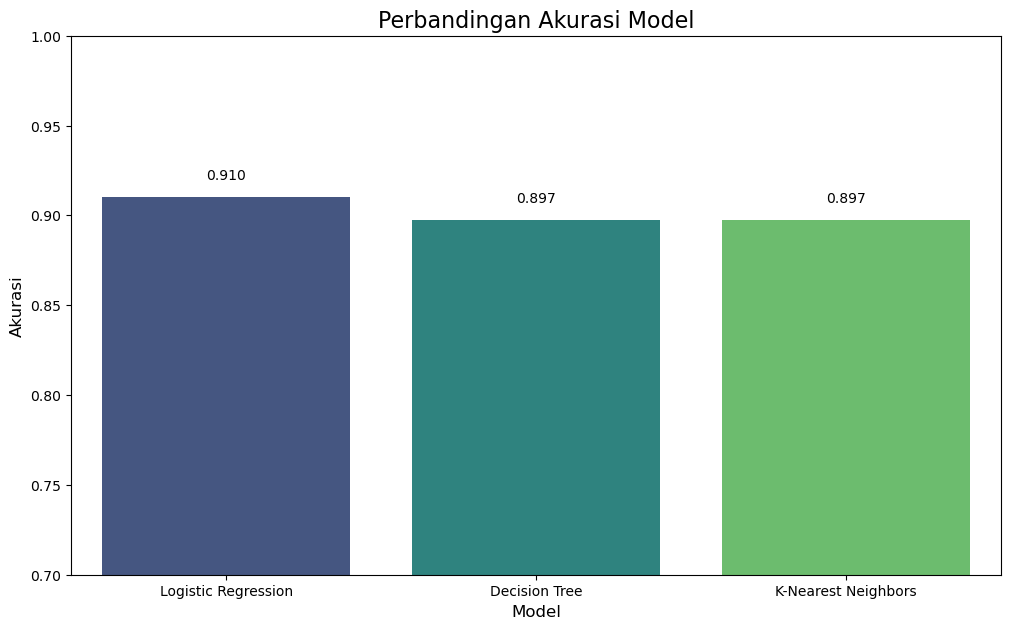

In [22]:
plt.figure(figsize=(12, 7))
sns.barplot(x=metrics_df.index, y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Perbandingan Akurasi Model', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.ylim(0.7, 1.0) # Sesuaikan batas Y untuk visualisasi yang lebih baik
for index, row in metrics_df.iterrows():
    plt.text(index, row['Accuracy'] + 0.01, f'{row["Accuracy"]:.3f}', color='black', ha="center")
plt.show()

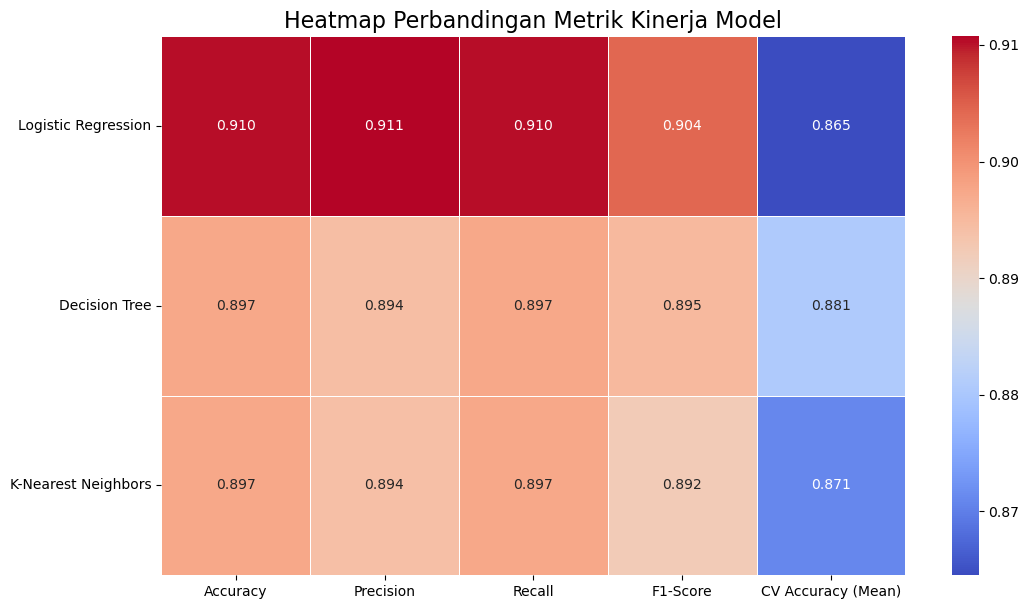


Pelatihan dan perbandingan model selesai!


In [23]:
plt.figure(figsize=(12, 7))
sns.heatmap(metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV Accuracy (Mean)']],
            annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Heatmap Perbandingan Metrik Kinerja Model', fontsize=16)
plt.yticks(rotation=0)
plt.show()

print("\nPelatihan dan perbandingan model selesai!")

# Model Selection and Deployment

In [24]:
# Pilih model terbaik (berdasarkan asumsi Decision Tree adalah yang terbaik)
best_model = best_dt_model
chosen_model_name = "Decision Tree Classifier"

print(f"\nModel terbaik yang dipilih untuk deployment adalah: {chosen_model_name}")


Model terbaik yang dipilih untuk deployment adalah: Decision Tree Classifier


In [25]:
# Simpan preprocessor dan model terbaik
import sklearn
print(sklearn.__version__)
try:
    joblib.dump(preprocessor, 'preprocessor.joblib')
    joblib.dump(best_model, 'best_model.joblib')
    # Juga simpan LabelEncoder untuk mengembalikan prediksi ke 'Yes'/'No'
    joblib.dump(le, 'label_encoder.joblib')
    print("\nPreprocessor, model, dan LabelEncoder berhasil disimpan ke 'preprocessor.joblib', 'best_model.joblib', dan 'label_encoder.joblib'.")
except Exception as e:
    print(f"\nError saat menyimpan model atau preprocessor: {e}")

1.6.1

Preprocessor, model, dan LabelEncoder berhasil disimpan ke 'preprocessor.joblib', 'best_model.joblib', dan 'label_encoder.joblib'.


# Evaluation

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# --- Contoh: Membuat dataset tiruan untuk ilustrasi (ganti dengan dataset asli dari notebook kamu) ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Hyperparameter tuning untuk Logistic Regression ---
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear mendukung L1 dan L2
}

grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Model terbaik
best_model = grid.best_estimator_

# Evaluasi
y_pred = best_model.predict(X_test)
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred)
}

# Simpan ke DataFrame untuk ditampilkan
results_df = pd.DataFrame([metrics], index=["Logistic Regression (Tuned)"])
best_params = grid.best_params_

results_df, best_params


(                             Accuracy  Precision  Recall  F1-Score
 Logistic Regression (Tuned)  0.982456   0.972973     1.0  0.986301,
 {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'})